# 방범용CCTV 위치와 인구 데이터 분석
- https://data.busan.go.kr/
- 파일데이터 "부산광역시_방범용 CCTV 정보_20230622.CSV" 다운로드
- 목표: CCTV 수와 인구대비 CCTV 비율을 파악
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인 

In [1]:
!pwd

/home/pkdata/data


In [2]:
# !pip install pandas

In [3]:
import pandas as pd
file_path = "./ref/부산광역시방범용CCTV정보20230622.csv"
CCTV = pd.read_csv(file_path, encoding = "EUC-KR")
CCTV.sample(3)

,CCTV 명칭,CCTV 좌표,CCTV 그룹
5571,(7차)_부암1동_진흥마제스타워뒤_동평로183번길33-16,"10.1.11.63:0:0:0:0:0:0,10.1.11.63:9400:",진구-7차
1826,(10차)_시실로_19-9_명륜2차아이파크1단지_앞_고4,"10.1.11.200:0:0:0:0:0:0,10.1.11.200:9400:",동래-10차
3826,(폐공가)_고신대병원_주변,"10.1.12.27:0:0:0:0:0:0,10.1.12.27:9400:",서구-폐공가


In [4]:
CCTV.columns = ['x','xx','local']
cctv = CCTV.rename(columns={"CCTV 그룹":"local"})['local']

In [5]:
# 방법1 구 별로 통합
cctv = cctv.apply(lambda x: x.split('-')[0]) #함수를 적용시키려면 apply 사용해야함

# 방법2 
# local_list =[]
# for v in cctv:
#     local_list.append(v.split('-')[0])
# cctv = pd.Series(local_list)

# # 방법3 정규표현식 사용
# cctv = cctv.str.extract(r"(\D+)-")[0]
cctv = cctv.value_counts()
cctv = cctv.reset_index()
cctv

,local,count
0,사하,431
1,사상,422
2,해운대,418
3,동래,404
4,금정,403
5,북구,403
6,진구,395
7,영도,381
8,연제,377
9,동구,374


- 행정동별 연령별 인구현황
- https://jumin.mois.go.kr/ageStatMonth.do
  <hr>
- 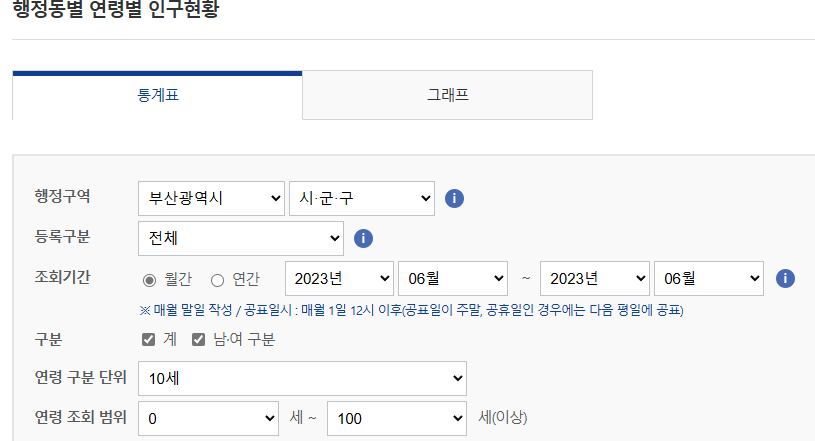

In [6]:
# !pip install openpyxl

In [7]:
import pandas as pd
file_path2 = "./ref/연령별인구현황월간202306.xlsx"
ori = pd.read_excel(file_path2,sheet_name="연령별인구현황",skiprows=3)
ori.head(2)

/home/pkdata/.local/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15


In [8]:
data = ori[['행정기관','총 인구수']]
data.columns = ['local','population']
data = data.loc[1:]
# data.replace("부산광역시 ","")

# data['local'] = data['local'].apply(lambda x: x.split(" ")[1])
data['local'] = data['local'].apply(lambda x: x.replace("부산광역시 ","").strip())
data = data.reset_index(drop=True) #drop=True 기존인덱스를 삭제하고 새롭게 부여
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [9]:
# cctv = cctv.sort_values(by="local", ascending = True)
# data = data.sort_values(by="local", ascending = True)
# 방법1
# total = pd.concat([cctv,data],axis = 1)
# total.columns = ['local','count','localx','population']
# total = total.drop(columns=['localx'])



# 방법2
# total = total.drop(total.columns[2], axis=1) #이름이 같을경우 인덱스가 사용안됨.


In [10]:
data['local'] = data['local'].apply(lambda x : x.replace("구","").replace("군","").replace('부산진',"진구").strip() if len(x.strip())>2 else x)

In [11]:
total = pd.merge(cctv,data, on='local')
total['population'] = total['population'].str.replace(",","").astype(int)
total = total.sort_values(by='population',ascending=False)
# total = total.set_index('local') #중요함
total

,local,count,population
2,해운대,418,383355
6,진구,395,357475
0,사하,431,300922
5,북구,403,276684
3,동래,404,272590
12,남구,351,255786
4,금정,403,218711
1,사상,422,203029
8,연제,377,202919
14,기장,344,179384


In [12]:
!echo 1234 | sudo -S apt-get update

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done


In [13]:
!echo 1234 | sudo -S apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [14]:
!echo 1234 | sudo -S fc-cache -fv

[sudo] password for pkdata: /usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [15]:
!rm ~/.cache/matplotlib -rf

Text(0.2, 0.3, '한글')

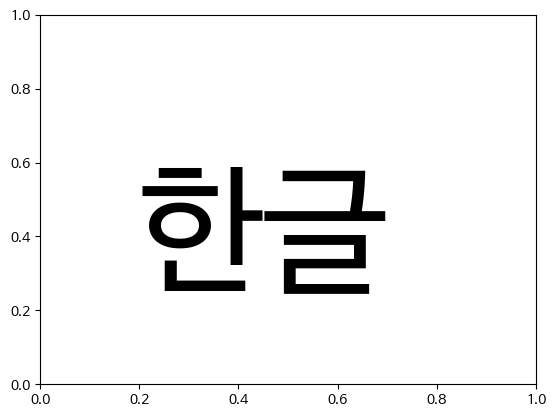

In [16]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

#리눅스용 폰트 경로 설정
plt.rc('font',family="NanumBarunGothic")
plt.text(0.2,0.3,'한글',size=100)

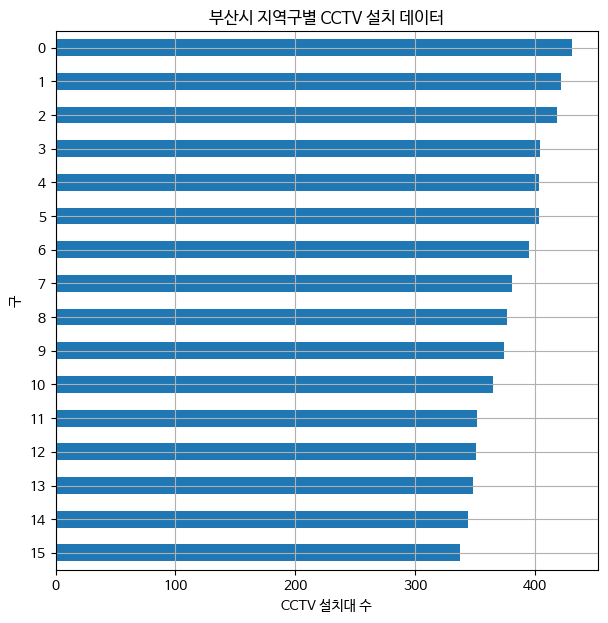

In [17]:
# plt.figure()
total['count'].sort_values().plot(y=total['local'], kind='barh', grid =True, figsize=(7,7), ylabel='구')


plt.title('부산시 지역구별 CCTV 설치 데이터')
plt.xlabel('CCTV 설치대 수')

plt.show()

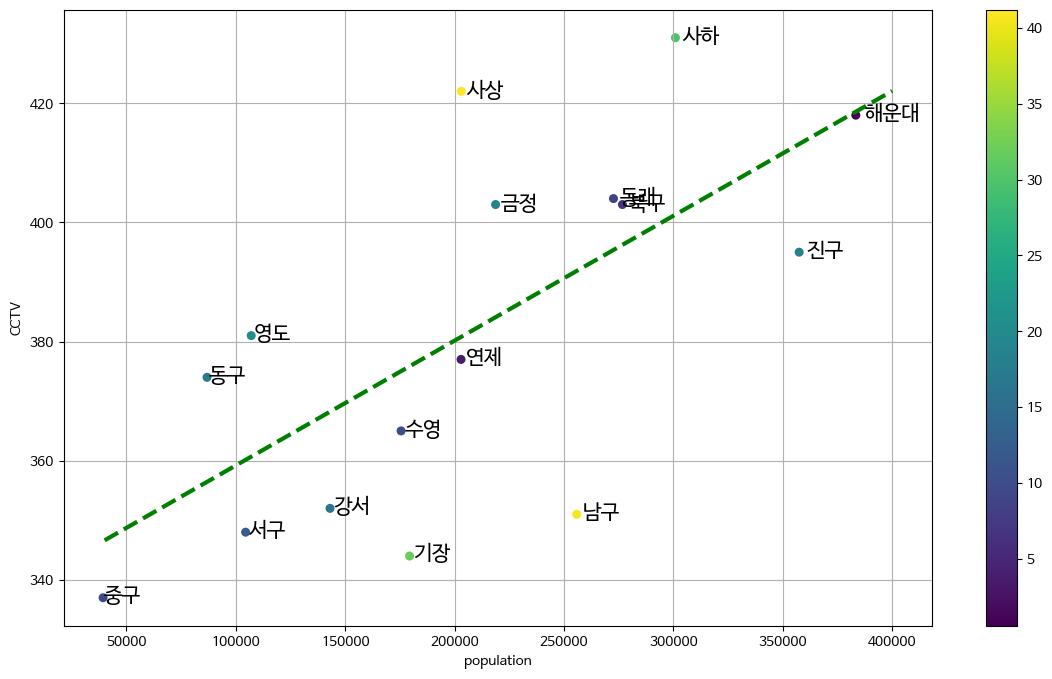

In [18]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)

# 오차
total['err'] = np.abs(total['count'] - f1(total['population']))


plt.figure(figsize=(14,8))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')
plt.scatter(total['population'], total['count'],s=30, c=total['err'])

plt.xlabel('population')
plt.ylabel('CCTV')




#  for i in range(len(total['local'])):
#     plt.text(total['population'][i], total['count'][i], total['local'][i], size=10)
for i in range(len(total['local'])):
    plt.text(total.iloc[i,2]*1.01, total.iloc[i,1]*0.998, total.iloc[i,0], size=15)
    
plt.grid() #격자무늬
plt.colorbar()
plt.show()